## Problem statement

The gievn data set have some sample of candidates who are part of a recruitment process of a company named Scalene Works.ScaleneWorks supports several information technology(IT) companies in India with their talent acquisition.
challenge they face:
1. About *30%  of the candidates who accept the jobs offers, do not join the company

This leads to huge loss of revenue and time as the companies initiate the recruitment process again to fill the workforce demand.
ScaleneWorks want to find out if a model can be build to predict the likelihood of a candidate joining the company. If the likelihood is high, then the company can go ahead and offer the jobs to the candidates.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
scalene=pd.read_csv('hr_data.csv')
scalene.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [3]:
# If Any null values 

scalene.isnull().sum()

# We can observe that no null value is there

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [4]:
data_c=scalene.copy()

In [5]:
data_c=data_c.drop(['SLNO','Candidate Ref'], axis=1)
data_c.head()

#Dropping columns 'SLNO','Candidate_Ref' because it is just a unique Id given to candidate 
#which are randomly generated 


,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [6]:
data_c.shape

(8995, 16)

### Studying on Categorical Data

In [7]:
data_cat=data_c.select_dtypes(include = 'object')
data_cat.head()

,DOJ Extended,Offered band,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,LOB,Location,Status
0,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


In [8]:
data_cat.columns

Index(['DOJ Extended', 'Offered band', 'Joining Bonus',
       'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB',
       'Location', 'Status'],
      dtype='object')

### Data Visualization

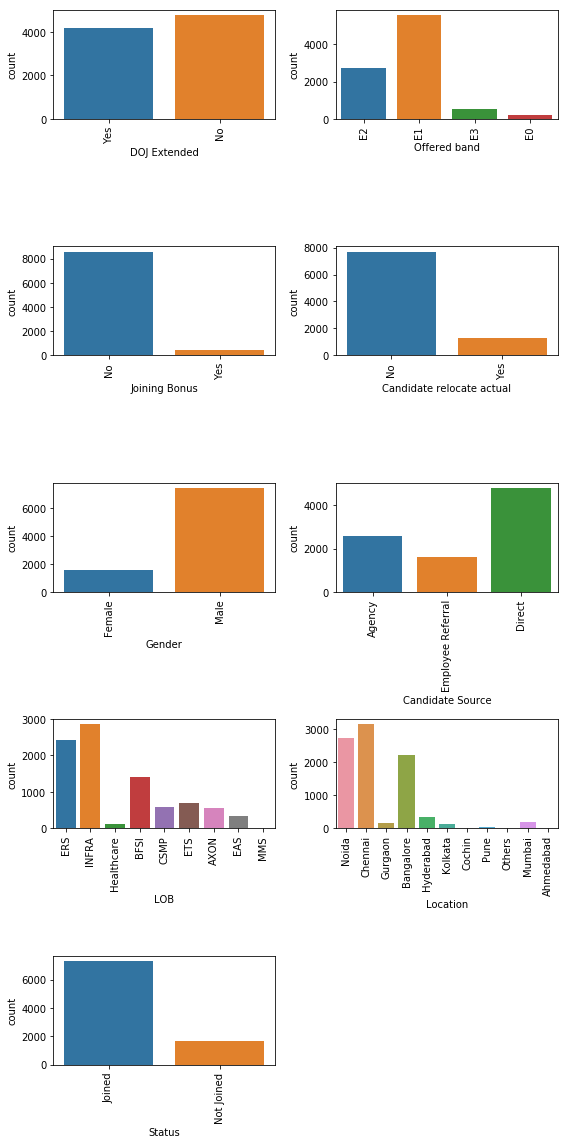

In [9]:
import itertools


l=['DOJ Extended', 'Offered band', 'Joining Bonus',
       'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB',
       'Location', 'Status']
fig = plt.subplots(figsize=(8,16))
length= len(l)
for i,j in itertools.zip_longest(l,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    sb.countplot(x=i,data=data_cat)
    plt.xticks(rotation=90)
    plt.tight_layout()

### Some Inferences from above observation

_1. Most of the candidates says 'No' to Date of Joining Extension.

_2. 8578 candidates out of 8995 not given any kind of Joining Bonus.(Almost 95%)

_3. Most of the candidates joined are 'MALE'
    * Male-Joined --> 6035
           Not Joined --> 1409
    * Female-Joined --> 1278
        Not Joined --> 273      

_4. INFRA has most number of offers follwed by ERS and BFSI.
    
_5. E1>E2>E3>E0 performance of candidates having E1 is most.
    * Candidates who are offered Band E1 out of them  E1-Joined--> 4527
                                                       -Not Joined--> 1041

_6. Most of the candidates actually not Relocated.78% of them joined the company those who not           Relocated
    
    NOT RELOCATED *   Joined --> 6023    
                      Not Joined --> 1682     
                      
    RELOCATED * Joined --> 1290    
       
_7.Most of the candiadtes came through DIRECT(4801) > AGENCY > EMPLOYEE REFERRAl.

_8. Most of the candidates got placed in  

       *1 Chennai     Joined --> 2486
                   Not Joined --> 664 
                   
       *2 Noida      Joined --> 2362
           Not Joined --> 365 
           
       *3 Bangalore  Joined --> 1742
           Not Joined --> 488   
     

### Studying on Numerical data

In [10]:
data_c.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DOJ Extended,8995,2,No,4788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration to accept offer,8995,NaN,NaN,NaN,21.4345,25.8116,0,3,10,33,224
Notice period,8995,NaN,NaN,NaN,39.2918,22.2202,0,30,30,60,120
Offered band,8995,4,E1,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pecent hike expected in CTC,8995,NaN,NaN,NaN,43.8648,29.789,-68.83,27.27,40,53.85,359.77
Percent hike offered in CTC,8995,NaN,NaN,NaN,40.6574,36.0641,-60.53,22.09,36,50,471.43
Percent difference CTC,8995,NaN,NaN,NaN,-1.5738,19.6107,-67.27,-8.33,0,0,300
Joining Bonus,8995,2,No,8578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Candidate relocate actual,8995,2,No,7705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,8995,2,Male,7444,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
le=LabelEncoder()
for column in data_c.columns:
    if data_c[column].dtype==type(object):
        data_c[column]=le.fit_transform(data_c[column])
data_c.head(10) 

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,14,30,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34,0
1,0,18,30,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34,0
2,0,3,45,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27,0
3,0,26,30,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34,0
4,1,1,120,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34,0
5,1,17,30,1,42.83,42.83,0.00,0,0,1,2,2,7,8,34,0
6,1,37,30,2,31.58,31.58,0.00,0,0,1,2,7,7,8,32,0
7,1,16,0,1,-20.00,-20.00,0.00,0,0,0,1,8,6,8,34,0
8,0,1,30,1,-22.22,-22.22,0.00,0,0,0,2,3,1,4,26,0
9,0,6,30,1,240.00,220.00,-5.88,0,0,1,2,3,2,2,34,0


### CORRELATION MAP

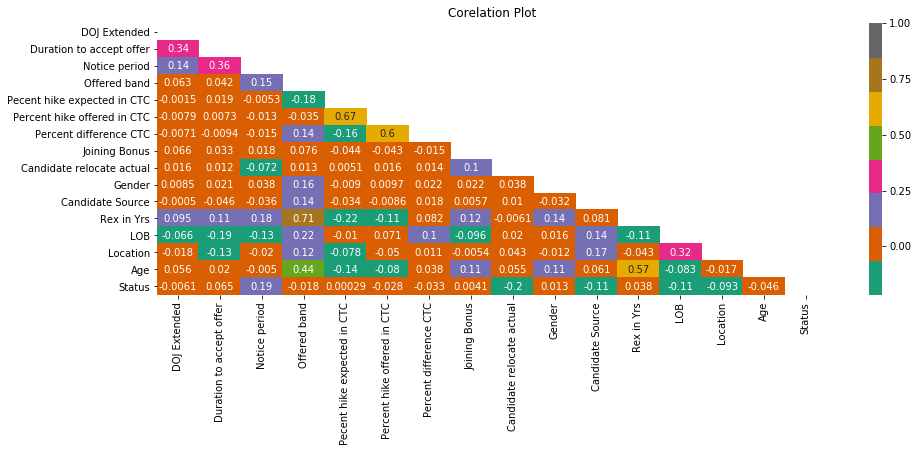

In [12]:
#plotting correlation plot of all Numerical columns

fig,ax=plt.subplots(figsize=(15,5))
mask = np.zeros_like(data_c.corr())
mask[np.triu_indices_from(data_c.corr())] = True
sb.heatmap(data_c.corr(),cmap='Dark2',annot=True,mask=mask,ax=ax)
plt.title('Corelation Plot')
plt.show()

 From the above correlation plot we found that between :
 
 _1.Percentage hike offered in CTC ~ Percentage hike expected in CTC has corr factor of 0.67
 
 _2.Percentage difference CTC ~ Percentage hike offered in CTC has corr factor of 0.6
 
 _3.Age of the candidate ~ Years of Experience has corr factor of 0.57
 
 _4.Age of the candiadte ~ Offered Band has corr factor of 0.44
 
 _5. Rex in Years(Years of exp) ~ offered Band has corr factor of 0.71 
 
 
 Which shows there is some relationship between these  columns.

In [13]:
x=data_c.iloc[:,:-1]     #Independent Variable
x.head()

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age
0,1,14,30,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34
1,0,18,30,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34
2,0,3,45,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27
3,0,26,30,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34
4,1,1,120,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34


### HEAT MAP

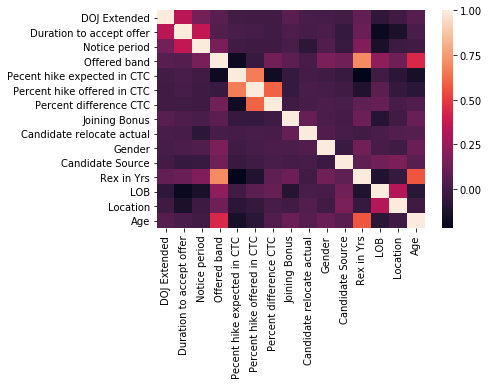

In [14]:
corr=data_c.drop('Status',axis=1).corr()
sb.heatmap(corr)

In [15]:
y=data_c.iloc[:,-1]        #Dependent variable 
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int32

In [16]:
#splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.2,random_state=0)

In [17]:
print(len(x_train),len(x_test))

7196 1799


### Testing performance by  Naive Bayes

In [18]:
gnb=BernoulliNB()

In [19]:

gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred)*100)
#print("accuracy of naive bayes algorithm ", gnb.score(x_test,y_test))

Accuracy: 80.98943857698721


In [20]:
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix is :',cm,sep='\n')

confusion_matrix is :
[[1457    0]
 [ 342    0]]


In [21]:
probs=gnb.predict_proba(x_test)
probs

array([[7.81515847e-01, 2.18484153e-01],
       [9.99741702e-01, 2.58298107e-04],
       [7.99149718e-01, 2.00850282e-01],
       ...,
       [7.81515847e-01, 2.18484153e-01],
       [9.98781881e-01, 1.21811855e-03],
       [8.13775096e-01, 1.86224904e-01]])

In [22]:
#Keep probabilities of the positive class only
prob_positive=probs[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc= metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.6610765933364641


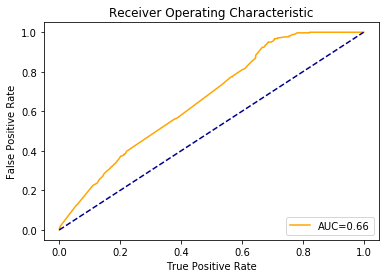

In [23]:
#plot ROC curve 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc ='lower right')

plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()


### Testing performance by Logistic Regression

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

log_r=LogisticRegression()
#fiting the model 
log_r=log_r.fit(x_train,y_train)

print('\n Logistic Regression Model')
log_auc=roc_auc_score(y_test,log_r.predict(x_test))

print('Logistic Regression AUC = %2.2f'% log_auc)

score=log_r.score(x_test,y_test)
print('Logistic Regressor Score=',score)


 Logistic Regression Model
Logistic Regression AUC = 0.52
Logistic Regressor Score= 0.8104502501389661


C:\Users\Soubhagya Ranjan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### From above observation we found that 'Naive Bayes(BernouliNB)' and ' Logistic Regression ' to be more accurate compared to others .

#### Where as different sampling and Dimensionality reduction measures could be used to make 'Classsification Tree' more accurate among others.

### Finding out Knn Score 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('KNN Score=',knn.score(x_test,y_test)*100)

KNN Score= 76.3757643135075


In [26]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.763757643135075


In [27]:
cm=confusion_matrix(y_test,y_pred)
print('confusion Matrix is :',cm,sep='\n')           

confusion Matrix is :
[[1295  162]
 [ 263   79]]


In [28]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).reshape(-1)    #ravel()
print('True neagtive:',tn)
print('False Positive:',fp)
print('False negative:',fn)
print('True positives:',tp)

True neagtive: 1295
False Positive: 162
False negative: 263
True positives: 79


### Finding the Classification Tree score

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(x_train,y_train)
print("score :",tree.score(x_test,y_test))



score : 0.7287381878821567


###  Hypothesis testing T-Test

In [30]:
cand=data_c['Age'][data_c['Status']==0].mean()
cand_n=data_c[data_c['Status']==1]['Age'].mean()

print('Mean age of candidates who Joined :' +str(cand))
print('Mean age of candidates who Not Joined :' +str(cand_n))

Mean age of candidates who Joined :30.00410228360454
Mean age of candidates who Not Joined :29.51783590963139


In [31]:
import scipy.stats as stats
import statistics
from scipy import stats

stats.ttest_1samp(a=data_c[data_c['Status']==1]['Age'],
                  popmean = cand)

Ttest_1sampResult(statistic=-5.08303165236985, pvalue=4.1290738724119264e-07)

Since the p-value is 0.000000412 <0.05  if the p-value falls lower than 5%(0.05),the null hypothesis is invalidated.

A smaller p-value bears more significance as it can tell you that the hypothesis may not explain the observation fairly.
